In [0]:
!pip install -q tensorflow==2.0.0-beta1

In [3]:
import tensorflow as tf
print(tf.__version__)

2.0.0-beta1


In [0]:
# Other imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Get the data
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2020-03-07 12:57:18--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2020-03-07 12:57:18 (30.8 MB/s) - ‘moore.csv’ saved [2302/2302]



In [0]:
# Load in the data
data = pd.read_csv('moore.csv', header=None).values
X = data[:,0].reshape(-1, 1) # make it a 2-D array of size N x D where D = 1
Y = data[:,1]


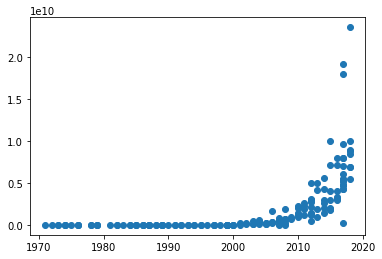

In [20]:
plt.scatter(X,Y)

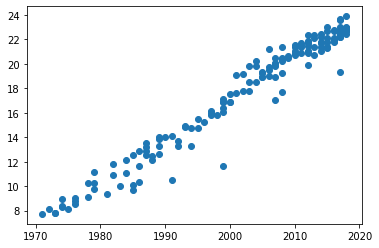

In [21]:
Y = np.log(Y)
plt.scatter(X,Y)

In [0]:
X = X - X.mean()

In [0]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1, input_shape=(1,)))

model.compile(optimizer=tf.keras.optimizers.SGD(0.001, 0.9), loss='mse') 


In [26]:
def schedule(epoch, lr):
  if epoch >= 50:
    return 0.0001
  return 0.001
 

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)


# Train the model
r = model.fit(X, Y, epochs=200, callbacks=[scheduler])

Train on 162 samples
Epoch 1/200
162/162 [==============================] - 0s 226us/sample - loss: 334.7471
Epoch 2/200
162/162 [==============================] - 0s 68us/sample - loss: 368.1712
Epoch 3/200
162/162 [==============================] - 0s 48us/sample - loss: 279.1956
Epoch 4/200
162/162 [==============================] - 0s 47us/sample - loss: 202.4910
Epoch 5/200
162/162 [==============================] - 0s 47us/sample - loss: 148.9597
Epoch 6/200
162/162 [==============================] - 0s 46us/sample - loss: 118.7292
Epoch 7/200
162/162 [==============================] - 0s 49us/sample - loss: 93.9153
Epoch 8/200
162/162 [==============================] - 0s 51us/sample - loss: 69.0405
Epoch 9/200
162/162 [==============================] - 0s 50us/sample - loss: 46.6702
Epoch 10/200
162/162 [==============================] - 0s 48us/sample - loss: 41.9185
Epoch 11/200
162/162 [==============================] - 0s 59us/sample - loss: 51.2316
Epoch 12/200
162/162 [==

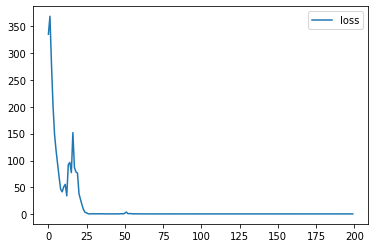

In [28]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label ='loss')
plt.legend()

In [29]:
print(model.layers) # Note: there is only 1 layer, the "Input" layer doesn't count
print(model.layers[0].get_weights())

[array([[0.3286415]], dtype=float32), array([17.740507], dtype=float32)]
